In [3]:
!pip install opencv-python

     |████████████████████████████████| 46.4 MB 1.5 MB/s eta 0:00:01


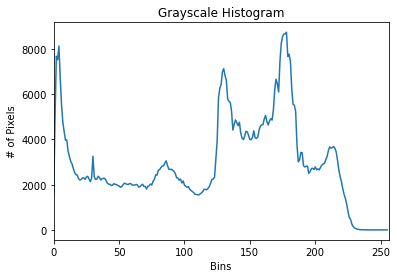

In [5]:
# create a python code to enhance the quality of a jpeg image.


# import the necessary packages
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt

# construct the argument parser and parse the arguments
path_to_image = "./image.png"

# load the image and show it
image = cv2.imread(path_to_image)
cv2.imshow("Original", image)

# convert the image to grayscale and create a histogram
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()
cv2.waitKey(0)

# equalize the histogram and display the result
eq = cv2.equalizeHist(gray)
cv2.imshow("Histogram Equalization", np.hstack([gray, eq]))
cv2.waitKey(0)

# apply CLAHE to the L*a*b* image
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(lab[:,:,0])

# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv2.merge((cl,lab[:,:,1],lab[:,:,2]))

# convert the image from the L*a*b* color space to RGB
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
cv2.imshow("CLAHE", np.hstack([image, final]))
cv2.waitKey(0)